In [ ]:
import os
import pandas as pd
import numpy as np

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/ANN/pima-indians-diabetes.csv', header=None)


In [ ]:
# Because thr CSV doesn't contain any header, we add column names 
# using the description from the original dataset website
dataset.columns = [
    "NumTimesPrg", "PlGlcConc", "BloodP",
    "SkinThick", "TwoHourSerIns", "BMI",
    "DiPedFunc", "Age", "HasDiabetes"]

In [ ]:
dataset.head()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.shape

(768, 9)

In [ ]:
# Data correlation matrix
corr = dataset.corr()
corr

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
NumTimesPrg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
PlGlcConc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThick,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
TwoHourSerIns,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiPedFunc,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
HasDiabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


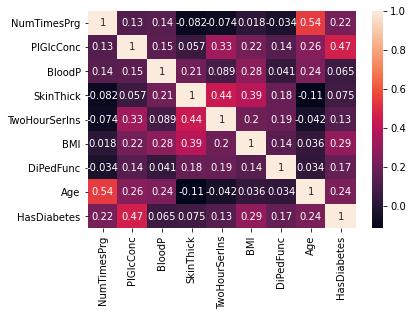

In [ ]:
%matplotlib inline
import seaborn as sns
sns.heatmap(corr, annot = True)

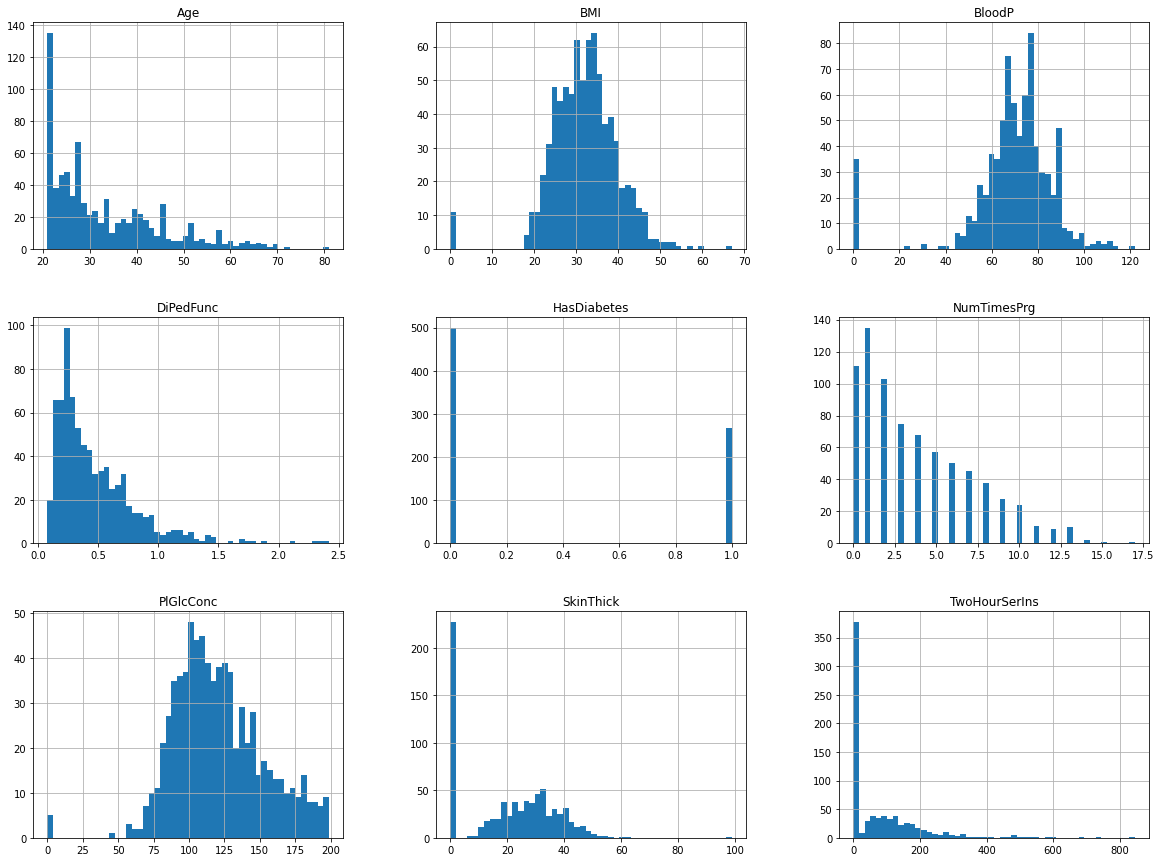

In [ ]:
# Visualise the Dataset
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
# Data cleaning and transformation

# Calculate the median value for BMI
median_bmi = dataset['BMI'].median()
# Substitute it in the BMI column of the
# dataset where values are 0
dataset['BMI'] = dataset['BMI'].replace(
    to_replace=0, value=median_bmi)

# Calculate the median value for BloodP
median_bloodp = dataset['BloodP'].median()
# Substitute it in the BloodP column of the
# dataset where values are 0
dataset['BloodP'] = dataset['BloodP'].replace(
    to_replace=0, value=median_bloodp)

# Calculate the median value for PlGlcConc
median_plglcconc = dataset['PlGlcConc'].median()
# Substitute it in the PlGlcConc column of the
# dataset where values are 0
dataset['PlGlcConc'] = dataset['PlGlcConc'].replace(
    to_replace=0, value=median_plglcconc)

# Calculate the median value for SkinThick
median_skinthick = dataset['SkinThick'].median()
# Substitute it in the SkinThick column of the
# dataset where values are 0
dataset['SkinThick'] = dataset['SkinThick'].replace(
    to_replace=0, value=median_skinthick)

# Calculate the median value for TwoHourSerIns
median_twohourserins = dataset['TwoHourSerIns'].median()
# Substitute it in the TwoHourSerIns column of the
# dataset where values are 0
dataset['TwoHourSerIns'] = dataset['TwoHourSerIns'].replace(
    to_replace=0, value=median_twohourserins)

In [ ]:
# Splitting the Dataset
# Split the training dataset in 80% / 20%
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(
    dataset, test_size=0.2, random_state=42)

In [ ]:
# Separate labels from the rest of the dataset
train_set_labels = train_set["HasDiabetes"].copy()
train_set = train_set.drop("HasDiabetes", axis=1)

test_set_labels = test_set["HasDiabetes"].copy()
test_set = test_set.drop("HasDiabetes", axis=1)

In [ ]:
# Feature Scaling
# Apply a scaler
from sklearn.preprocessing import MinMaxScaler as Scaler

scaler = Scaler()
scaler.fit(train_set)
train_set_scaled = scaler.transform(train_set)
test_set_scaled = scaler.transform(test_set)

In [ ]:
# Scaled Values
df = pd.DataFrame(data=train_set_scaled)
df.head()

,0,1,2,3,4,5,6,7
0,0.117647,0.258065,0.489796,0.272727,0.019832,0.282209,0.096499,0.000000
1,0.529412,0.438710,0.591837,0.290909,0.019832,0.204499,0.514091,0.483333
2,0.058824,0.612903,0.224490,0.200000,0.082933,0.214724,0.245944,0.016667
3,0.000000,0.754839,0.265306,0.272727,0.019832,0.075665,0.075149,0.733333
4,0.352941,0.580645,0.571429,0.527273,0.427885,0.572597,0.068318,0.416667


In [ ]:
# Select and train a model
#Comparing multiple algorithms

# Import all the algorithms we want to test
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Import the slearn utility to compare algorithms
from sklearn import model_selection

In [ ]:
# Prepare an array with all the algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('LSVC', LinearSVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('DTR', DecisionTreeRegressor()))

In [ ]:
seed = 7
results = []
names = []
X = train_set_scaled
Y = train_set_labels

In [ ]:
# Every algorithm is tested and results are
# collected and printed
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(
        model, X, Y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (
        name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

LR: 0.754019 (0.038302)
KNN: 0.740984 (0.049627)
NB: 0.739450 (0.062140)
SVC: 0.763749 (0.033309)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LSVC: 0.763802 (0.042701)
RFC: 0.767028 (0.032285)
DTR: 0.713168 (0.042565)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


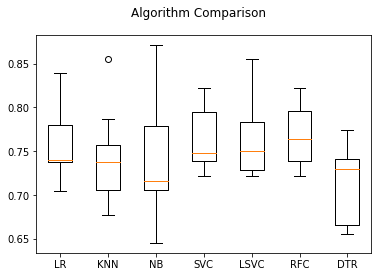

In [ ]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# Find the best parameters for SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [1.0, 10.0, 50.0],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'shrinking': [True, False],
    'gamma': ['auto', 1, 0.1],
    'coef0': [0.0, 0.1, 0.5]
}

model_svc = SVC()

grid_search = GridSearchCV(
    model_svc, param_grid, cv=10, scoring='accuracy')
grid_search.fit(train_set_scaled, train_set_labels)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1.0, 10.0, 50.0], 'coef0': [0.0, 0.1, 0.5],
                         'gamma': ['auto', 1, 0.1],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                         'shrinking': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
# Print the best score found
grid_search.best_score_

0.7686938127974617

In [ ]:
# Apply the parameters to the model and train it
# Create an instance of the algorithm using parameters
# from best_estimator_ property
svc = grid_search.best_estimator_

# Use the whole dataset to train the model
X = np.append(train_set_scaled, test_set_scaled, axis=0)
Y = np.append(train_set_labels, test_set_labels, axis=0)

# Train the model
svc.fit(X, Y)

SVC(C=10.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Make a Prediction
# We create a new (fake) person having the three most correated values high
new_df = pd.DataFrame([[6, 168, 72, 35, 0, 43.6, 0.627, 65]])
# We scale those values like the others
new_df_scaled = scaler.transform(new_df)

In [ ]:
# We predict the outcome
prediction = svc.predict(new_df_scaled)

In [ ]:
# A value of "1" means that this person is likley to have type 2 diabetes
prediction

array([1])

Conclusion
We finally find a score of 76% using SVC algorithm and parameters optimisation. Please note that there may be still space for further analysis and optimisation, for example trying different data transformations or trying algorithms that haven't been tested yet. Once again I want to repeat that training a machine learning model to solve a problem with a specific dataset is a try / fail / improve process.